**Name:** Yuvadarshini S

**Register Number:** 212221230126

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
# dataset1 = pd.read_csv('data1.csv')

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('student_data').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})

In [ ]:
dataset1.head()

,input,output
0,1.0,6.0
1,2.0,12.0
2,3.0,18.0
3,4.0,24.0
4,5.0,30.0


In [ ]:
X = dataset1[['input']].values
y = dataset1[['output']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

**Name:** Yuvadarshini S

**Register Number:** 212221230126

In [ ]:
#Create the model
ai_brain = Sequential([
    Dense(15, activation='relu',input_shape=[1]),
    Dense(9, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
ai_brain.compile(optimizer='rmsprop', loss='mse')

In [18]:
# fit the model
ai_brain.fit(X_train1, y_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3444.6196
Epoch 502/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3440.0596
Epoch 503/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3435.4900
Epoch 504/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3430.9111
Epoch 505/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3426.3232
Epoch 506/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3421.7263
Epoch 507/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3417.1199
Epoch 508/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3412.5042
Epoch 509/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3407.8794
Epoch 510/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3403.2458
Epoch 511/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3398.6025
Epoch 512/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3393.9502
Epoch 513/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3389.2888
Epoch 514/3000
1/1 ━━━━━━━

In [19]:
loss_df = pd.DataFrame(ai_brain.history.history)

Yuvadarshini S(212221230126)


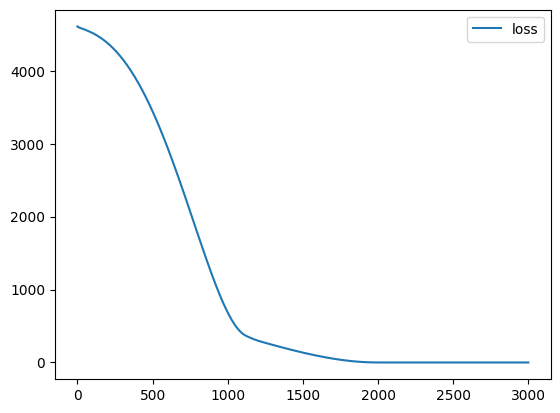

In [28]:
loss_df.plot()
print("Yuvadarshini S(212221230126)")

In [21]:
X_test1 = Scaler.transform(X_test)

In [23]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0094


0.009393407963216305

In [32]:
from tensorflow.keras.metrics import RootMeanSquaredError as rmse
err = rmse()
preds = ai_brain.predict(X_test1)
err(y_test,preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.096919596>

In [34]:
err = rmse()
print("Name: Yuvadarshini S\n")
print("Root Mean Squred Error:",err(y_test,preds).numpy())

Name: Yuvadarshini S

Root Mean Squred Error: 0.096919596


In [25]:
X_n1 = [[30]]

In [26]:
X_n1_1 = Scaler.transform(X_n1)

In [36]:
print("Name: Yuvadarshini S\n")
ai_brain.predict(X_n1_1)

Name: Yuvadarshini S

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[180.07901]], dtype=float32)